In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv(r"C:\ML Course\Datasets\Housing.csv")

In [3]:
dataset.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [6]:
dataset["mainroad"] = le.fit_transform(dataset["mainroad"])
dataset["guestroom"] = le.fit_transform(dataset["guestroom"])
dataset["basement"] = le.fit_transform(dataset["basement"])
dataset["hotwaterheating"] = le.fit_transform(dataset["hotwaterheating"])
dataset["airconditioning"] = le.fit_transform(dataset["airconditioning"])
dataset["prefarea"] = le.fit_transform(dataset["prefarea"])
dataset["furnishingstatus"] = le.fit_transform(dataset["furnishingstatus"])

In [7]:
dataset.head(15)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,0,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,0,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,1,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,0,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,0,11410000
5,7500,3,3,1,1,0,1,0,1,2,1,1,10850000
6,8580,4,3,4,1,0,0,0,1,2,1,1,10150000
7,16200,5,3,2,1,0,0,0,0,0,0,2,10150000
8,8100,4,1,2,1,1,1,0,1,2,1,0,9870000
9,5750,3,2,4,1,1,0,0,1,1,1,2,9800000


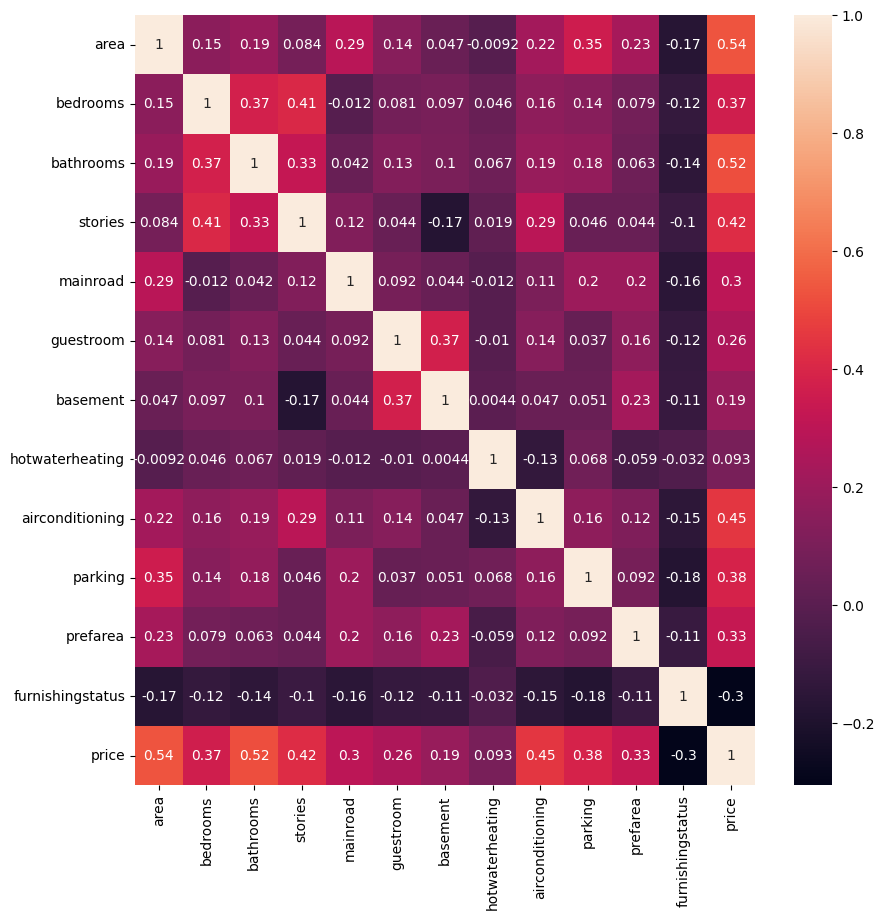

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [9]:
x = dataset.iloc[:,:-1]
y = dataset["price"]

In [10]:
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [14]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

76.24579467323474

# Lasso

In [15]:
la = Lasso(alpha=10)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

76.24581156976238

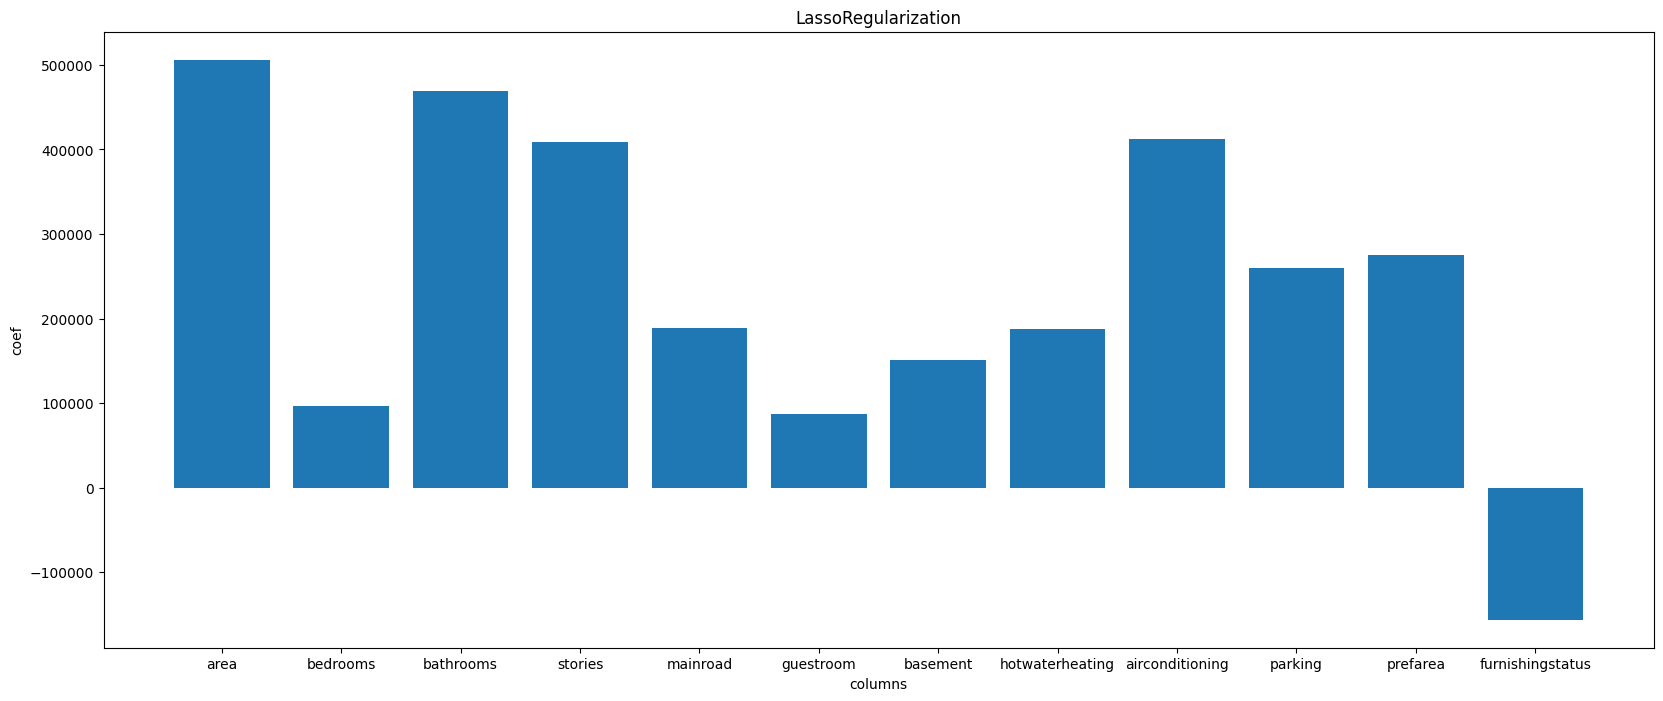

In [16]:
plt.figure(figsize=(20,8))
plt.bar(x.columns,la.coef_)
plt.title("LassoRegularization")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Ridge

In [17]:
ri = Ridge(alpha = 10 )
ri.fit(x_train, y_train)
ri.score(x_test, y_test)*100

76.22558828868092

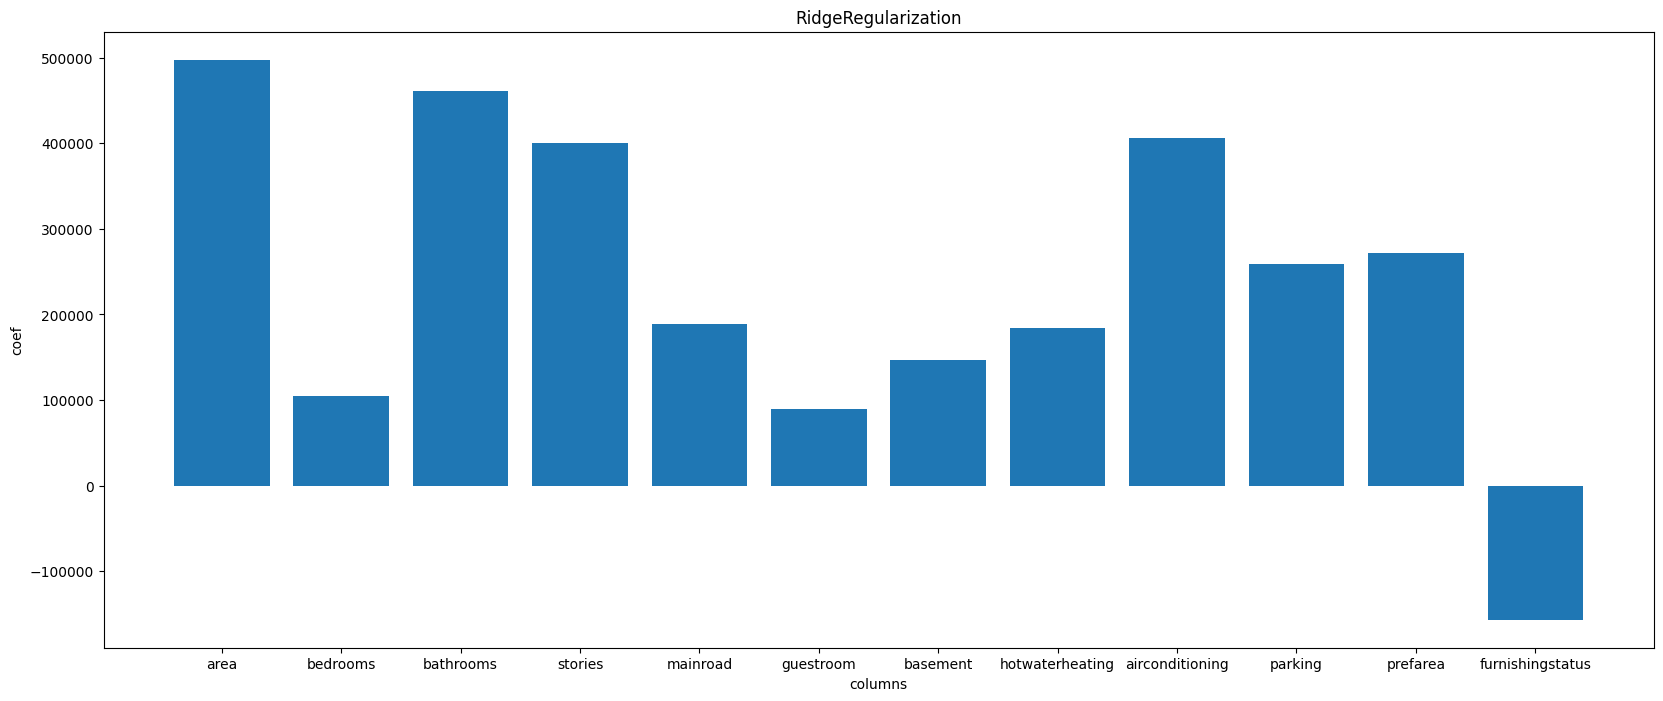

In [18]:
plt.figure(figsize=(20,8))
plt.bar(x.columns,ri.coef_)
plt.title("RidgeRegularization")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [20]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

808536030826.6129
730327.8455685504
899186.3159693951


In [21]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

807848264011.8358
731364.1632036384
898803.7961712421


In [23]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

807848838640.2037
731365.8227168074
898804.1158340363


In [25]:
df = pd.DataFrame({"col_names":x.columns, "LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_names,LinearRegression,Lasso,Ridge
0,area,506095.343872,506093.493292,497516.101574
1,bedrooms,96862.371554,96859.221419,104481.872957
2,bathrooms,469318.593521,469316.501603,461430.309431
3,stories,409358.764748,409352.797349,400789.915475
4,mainroad,188506.116642,188500.628110,188766.941030
5,guestroom,87646.892716,87641.922715,89898.246944
6,basement,151257.397332,151250.546636,147193.523105
7,hotwaterheating,188279.626154,188270.193998,183661.700016
8,airconditioning,411879.771913,411874.097309,406234.199444
9,parking,259659.215558,259655.048783,259026.257664
